In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 15.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


#Challenge


*   Calculate cc returns of both stocks and drop NA values

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018",interval="m")
sprices = sprices['Adj Close']

sr = np.log(sprices) - np.log(sprices.shift(1))

sr=sr.dropna()
sr.columns=['ALFAA','MXX']


*   Do a scatter plot including the regression line and interpret the plot

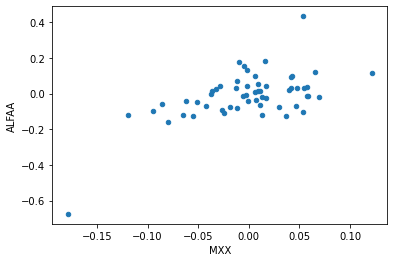

In [3]:
sr.plot.scatter(x='MXX', y='ALFAA')
plt.show()

PODEMOS VER QUE TIENEN UNA RELACION POSITIVA, YA QUE CADA QUE UNO AUMENTA, EL OTRO TAMBIEN, AUNQUE EN ALFA, AUMENTA EL BOBLE, YA QUE PODEMOS VER QUE LA ESCALA DE MX VA DE .5 EN .5 Y LA DE ALFA VA DE .1 EN .1

In [4]:
model = LinearRegression(fit_intercept=True)
X = sr['MXX'][:, np.newaxis]
Y = sr['ALFAA'][:, np.newaxis]
model.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression()

In [5]:
model.coef_

array([[1.53877877]])

In [6]:
model.intercept_

array([-0.00777122])

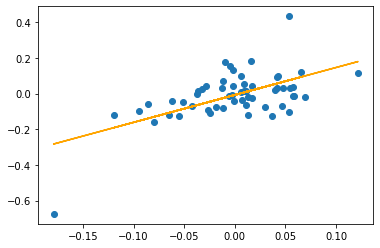

In [7]:
yfit = 1.538 * X - 0.0077
plt.plot(X, yfit, c = 'orange')
plt.scatter(sr['MXX'], sr['ALFAA'])

USANDO LA REGRESION LINEAL DE SKLEARN, PUSIMOS OBTENER LOS COEFICIENTES Y LA INTERCEPCION DE NUESTRO MODELO, DONDE VEMOS QUE NUESTRA M = 1.53 Y B = -.0077

In [8]:
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()
 
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     29.23
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.49e-06
Time:                        14:22:47   Log-Likelihood:                 45.229
No. Observations:                  56   AIC:                            -86.46
Df Residuals:                      54   BIC:                            -82.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0078      0.015     -0.529      0.5


*   Interpret the beta coefficients and their corresponding t and p values, and their 95% confidence intervals 

*   Write down the regression equation

LA ECUACION DE NUESTRA REGRESION LINEAL ES:E[ALFA]= -0.00777122 + 1.53877877*MXX.

